# 1) Linear Regression Model

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*b1 +b0$.

In [196]:
import torch
import numpy as np

In [198]:
b = torch.tensor([-1.0])
w = torch.tensor([2.0])

In [200]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.3).view(-1, 1)
f = w*X+b
Y = f + torch.randn(f.shape)
print(X.shape, Y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


1. b0, b1 각각 뽑아

In [273]:
b1 = torch.tensor(torch.randn([1]), requires_grad=True)
b0 = torch.tensor(torch.randn([1]), requires_grad=True)

def forward(x):
  return x*b1+b0

def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

lr=0.1
epochs = 100
history = []

for epoch in range(epochs):
    Yhat = forward(X) # X : [20,1], Yhat : [20,1]
    loss = criterion(Yhat,Y) # 둘다 [20,1]
    b1.grad=None
    b0.grad=None
    loss.backward()
    b1.data = b1.data-lr*b1.grad
    b0.data = b0.data-lr*b0.grad
    history.append(loss.item())

C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\2951357554.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b1 = torch.tensor(torch.randn([1]), requires_grad=True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\2951357554.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b0 = torch.tensor(torch.randn([1]), requires_grad=True)


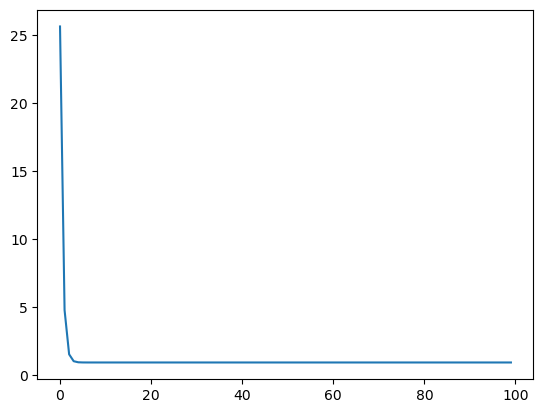

In [275]:
import matplotlib.pyplot as plt
plt.plot(history)

In [277]:
print(b1.data, b0.data)

tensor([1.7149]) tensor([-1.1823])


2. design matrix 만들어 beta 한번에 [2,1]로 뽑아

In [280]:
ones = torch.ones([X.shape[0],1]) # X : [n, 1]
XX = torch.concat([ones, X], axis=1) # XX : [n, 2]

In [282]:
beta = torch.tensor(torch.randn([2,1]), requires_grad=True)

def forward(x):
  return x @ beta
def loss_ftn(y, yhat):
  return torch.mean((y-yhat)**2)

lr = 0.01
epochs = 100
history = []
for i in range(epochs):
    Yhat = forward(XX)
    Loss = loss_ftn(Y, Yhat)
    beta.grad = None
    Loss.backward()
    beta.data -= lr * beta.grad
    history.append(Loss.item())

C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\2816580951.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1]), requires_grad=True)


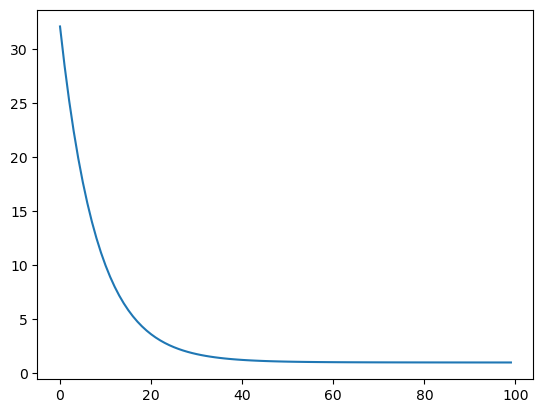

In [284]:
plt.plot(history)

In [286]:
beta.data

tensor([[-1.1288],
        [ 1.7126]])

### SGD 사용
* optimizer.zero_grad()
  
w.grad = None

b.grad = None

* optimizer.step()
  
w.data = w.data-lr*w.grad

b.data = b.data-lr*b.grad

3. b0, b1 각각 뽑아 torch.optim.SGD() 안에 []로 넣기

In [289]:
b1 = torch.tensor(torch.randn([1]), requires_grad=True)
b0 = torch.tensor(torch.randn([1]), requires_grad=True)
optimizer = torch.optim.SGD([b1, b0], lr=0.1)

def forward(x):
  return b0 + b1 * x
def loss_ftn(y, yhat):
  return torch.mean((y-yhat)**2)

epochs = 100
history = []

for i in range(epochs):
    Yhat = forward(X)
    Loss = loss_ftn(Y, Yhat)
    optimizer.zero_grad()  # w.grad = None # b.grad = None
    Loss.backward()
    optimizer.step() # w.data -= lr * w.grad # b.data -= lr * b.grad
    history.append(Loss.item())

C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\4011488433.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b1 = torch.tensor(torch.randn([1]), requires_grad=True)
C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\4011488433.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b0 = torch.tensor(torch.randn([1]), requires_grad=True)


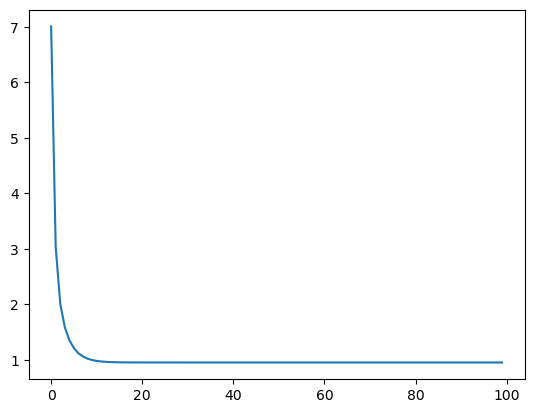

In [291]:
plt.plot(history)

In [293]:
print(b1.data, b0.data)

tensor([1.7149]) tensor([-1.1823])


4. beta 값을 torch.nn.Linear()로 뽑기. 이때 2개 뽑고 bias = False. SGD 인자로 forward.weight 대입

In [296]:
forward = torch.nn.Linear(2,1,bias=False) # b0, b1
optimizer = torch.optim.SGD([forward.weight], lr=lr) # list 형태로 넣어

def loss_ftn(y, yhat):
  return torch.mean((y-yhat)**2)

lr = 0.1
epochs = 100
history = []

for i in range(epochs):
    Yhat = forward(XX) # XX @ beta # 2개 뽑았으니
    Loss = loss_ftn(Y, Yhat)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    history.append(Loss.item())

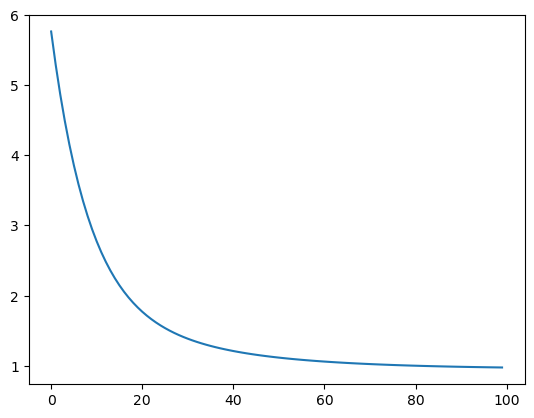

In [298]:
plt.plot(history)

5. b1 하나만 뽑되, bias=True로 -> [forward.weight] 대신 forward.parameters() 대입 가능

In [305]:
forward = torch.nn.Linear(1,1,bias=True)
optimizer = torch.optim.SGD(forward.parameters(), lr=lr) # [forward.weight] 넣어도 가능

def loss_ftn(y, yhat):
  return torch.mean((y-yhat)**2)

lr = 0.1
epochs = 100
history = []

for i in range(epochs):
    Yhat = forward(X)
    Loss = loss_ftn(Y, Yhat)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    history.append(Loss.item())

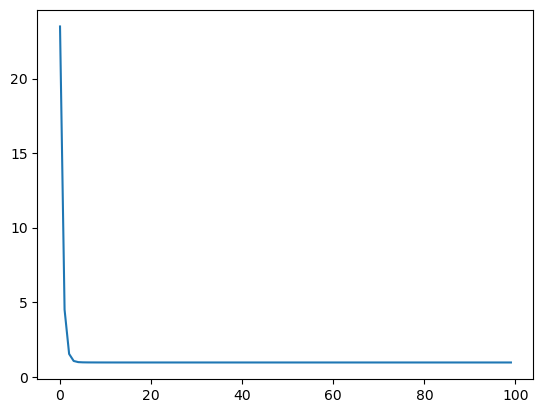

In [307]:
plt.plot(history)

6. b1 만 torch.nn.Linear로 뽑고, b0는 따로 랜덤 -> 인자로 둘다 넣기. Yhat 구할 때 따로 b0 더해주기

In [310]:
b0 = torch.tensor(torch.randn([1]), requires_grad=True)
forward = torch.nn.Linear(1,1,bias=False)
optimizer = torch.optim.SGD([forward.weight, b0], lr=lr) # list 형태로 넣어

def loss_ftn(y, yhat):
  return torch.mean((y-yhat)**2)

lr = 0.1
epochs = 100
history = []

for i in range(epochs):
    Yhat = forward(X) + b0
    Loss = loss_ftn(Y, Yhat)
    optimizer.zero_grad()
    Loss.backward()
    optimizer.step()
    history.append(Loss.item())

C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\1377757972.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b0 = torch.tensor(torch.randn([1]), requires_grad=True)


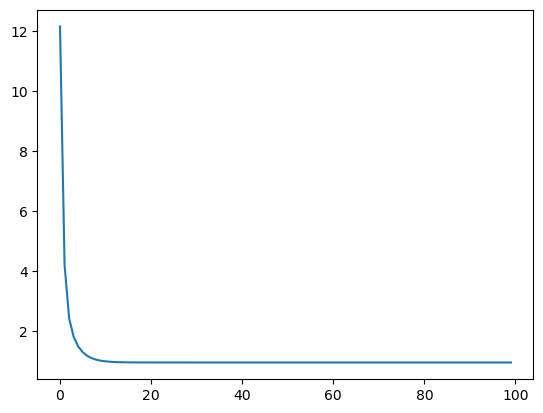

In [312]:
plt.plot(history)

# 2) Review : Linear regression

In [321]:
!pip install ISLP

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ----------- ---------------------------- 1.0/3.6 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 2.4/3.6 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   - -------------------------------------- 1.3/43.7 MB 6.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.6/43.7 MB 6.0 MB/s eta 0:00:07
   --- ------------------------------------ 3.9/43.7 MB 6.0 MB/s eta 0:00:07
   ---- ----------------------------------- 5.0/43.7 MB 5.9 MB/s eta 0:00:07
   ----- ---------------------------------- 6.3/43.7 MB 5.9 MB/s eta 0:00:07
   ------ --------------------------------- 7.6/43.7 MB 5.9 MB/s eta 0:00:07
   -------- ------------------------------- 8.9/43.7 MB 6.0 MB/s eta 

In [322]:
import ISLP

In [339]:
Auto = ISLP.load_data("Auto")

X1 = torch.tensor(Auto["horsepower"], dtype=torch.float32)
X2 = torch.tensor(Auto["cylinders"], dtype=torch.float32)
Y = torch.tensor(Auto["mpg"], dtype=torch.float32).reshape([-1,1])

C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\1110864295.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X1 = torch.tensor(Auto["horsepower"], dtype=torch.float32)
C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\1110864295.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X2 = torch.tensor(Auto["cylinders"], dtype=torch.float32)
C:\Users\annyu\AppData\Local\Temp\ipykernel_3728\1110864295.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

In [343]:
Y.shape

torch.Size([392, 1])

In [345]:
# normalization
uy, stdy = torch.mean(Y), torch.std(Y)
Y_normal = (Y-uy)/stdy

X = torch.stack([X1, X2], axis=1)
ux, stdx = torch.mean(X, axis=0), torch.std(X, axis=0)
X_normal = (X-ux)/stdx 

In [347]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [349]:
dataset = TensorDataset(X_normal,Y_normal)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

In [351]:
model = torch.nn.Linear(2, 1, bias=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

epochs = 300
n = len(trainloader.dataset) # 500
history = []

for epoch in range(epochs):
  LOSS = 0
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    LOSS += loss* len(x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  history.append(LOSS.item()/n)

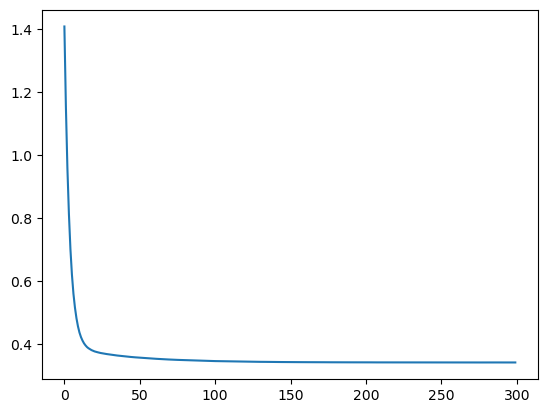

In [352]:
import matplotlib.pyplot as plt
plt.plot(history)

In [355]:
# MSE loss
Yhat = model(X_normal)
criterion(Yhat, Y_normal)

tensor(0.3422, grad_fn=<MeanBackward0>)

In [357]:
# MSE loss => 데이터 수가 많기 때문에 보통 이 방법으로 계산해
LOSS = 0
for xx, yy in trainloader:
  yhat = model(xx)
  loss = criterion(yhat, yy)
  LOSS += loss * len(xx)
LOSS = LOSS/n
LOSS

tensor(0.3422, grad_fn=<DivBackward0>)